# Project: Investigate a Dataset - Medical Appointments No Shows
***

# Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a>
    <ul><a href="#assess">- Data Assessment</a></ul>
    <ul><a href="#clean">- Data Cleaning</a></ul>
    </li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

***
<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is __focused on the question of whether or not patients show up for their appointment__. A number of characteristics about the patient are included in each row.
<ul>
<li>‘ScheduledDay’ tells us on what day the patient set up their appointment.</li>
<li>‘Neighborhood’ indicates the location of the hospital.</li>
<li>‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li>
<li>Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.</li>
</ul>

**The main question is how these factors affect patients deciesions? and why a proportion of patients miss their scheduled appointments?**

***Question(s) for Analysis***
> I am making a report designed for estimating the relation of some variables namely __age__, __gender__, __neighbourhood__, and __scholarship__ in relevance to miss patients scheduled medical appointments.
And what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment.

### **Features List**

1. __PatientId__    :ID of a patient
2. __AppointmentID__: ID of each appointment
3. __Gender__: Male or Female
4. __Age__          : The patient age
5. __Neighbourhood__: location of appointment.
6. __Scholarship__  : True of False . <br> The Project Family Grant of the World Bank, <br>collaborates with the [Bolsa Familia program](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia), consolidating the various income transfer programs.
7. __Hipertension__ : True or False
8. __Diabetes__     : True or False
9. __Alcoholism__   : True or False
10. __Handcap__     : True or False
11. __SMS_received__: True or False.
12. __No-show__     : True or False.
***

### Import required packages:

In [1]:
# import all required packages to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
# include a 'magic word'
%matplotlib inline

***
<a id='wrangling'></a>
## Data Wrangling

We will load in the data so that:
- ***Data Assessment*** : checking for cleanliness
- ***Data Cleaning***: trim and clean then save new cleaned dataset for analysis.

In [2]:
# Load the data and print out a few lines.
df = pd.read_csv('noshowappnts.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='assess'></a>
## Data Assessment
- Through this phase we are checking the dataset to inspect and specify any issues to clean it later in the cleaning phase.

In [3]:
# Perform operations to inspect columns data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

- This analysis report will depend on list of features only and __execlude (Drop)__ the remaining as follows: __PatientId__, __AppointmentID__, __ScheduledDay__, __AppointmentDay__.<a href="#solve1">link</a>

In [4]:
# look for instances of missing data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- All features (__columns__) need to be __renamed__ to standard names, lowercase, underscore instead of space inbetween.<a href="#solve2">link</a>
- Fix spelling mistake by rename "hipertension" column to "__hypertension__".<a href="#solve3">link</a>

In [5]:
# Check total patients counts (rows) and features related
df.shape
print('There are almost {} patients and {} features in the dataset.'.format(df.shape[0],df.shape[1]))

There are almost 110527 patients and 14 features in the dataset.


In [6]:
# Look for unique patients
df.PatientId.nunique()

62299

- There are __62299__ original patients have __ONE__ or __MORE__ schduled appointments.

In [7]:
# Look for duplicated patients
df.PatientId.duplicated().sum()

48228

- There are __48228__ patients have **another** __ONE__ or __More__ schduled appointments
- Based on each 1 patient could schdule __ONE__ or __More__ __appointments__, then this duplication in patientid columns is normal.

In [8]:
# look for null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

- There are __No null values__ found in the dataset.

In [9]:
# look for duplicated rows values
check_dedupe = df.duplicated().sum()
print('There are {} duplicated rows found.'.format(check_dedupe))

There are 0 duplicated rows found.


In [10]:
# show general statistics for the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- We discover above in __Age__ column stats  __unrealistic__ value __-1__ need to be resolved.<a href="#solve4">link</a>

In [11]:
# number of unique values in all dataset
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

- Based on the above unique values, we need to know what is these values in the following columns:<br> __- No-show__ <br>- __Scholarship__ <br>- __Neighbourhood__ <br> __- Hipertension__ <br> __- Diabetes__ <br> __- SMS_received__

In [12]:
# The unique values for No Show feature
print(df['No-show'].unique())

['No' 'Yes']


- If the patients showed up:__No__, and  if they did not show up:__Yes__.

In [13]:
# The unique values for Scholarship feature
print(df['Scholarship'].unique())

[0 1]


- If the patients enrolled:__1__, and  if they have not:__0__.

In [14]:
# number of unique values for Neighbourhood feature
locations = df['Neighbourhood'].nunique()
print('There are {} locations where the appointment will be taken.'.format(locations))

There are 81 locations where the appointment will be taken.


In [15]:
# The unique values for Scholarship feature
print(df['Hipertension'].unique())

[1 0]


- If the patients have:__1__, and  if they have not:__0__.

In [16]:
# The unique values for Scholarship feature
print(df['Diabetes'].unique())

[0 1]


- If the patients have:__1__, and  if they have not:__0__.

In [17]:
# The unique values for Scholarship feature
print(df['SMS_received'].unique())

[0 1]


- If the patients received:__1__, and  if they did not:__0__.

***We will used the above results later on to <a href="#explore">explore data analysis</a>.***

<a id='clean'></a>
## Data Cleaning
- The following steps to investigating the data through some stages to clean data values to move to the next phase, then explore and create visualizations later on.
 

<a id="solve1"></a>
***Drop columns***

In [18]:
# This analysis report will depend on list of features only and execlude the remaining as follows:
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)
# Show the first row to check the results
df.head(1)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id="solve2"></a>
***Rename columns***

In [19]:
# Rename columns to standard names: lowercase, underscore instead of space inbetween
df.rename(columns=lambda x: x.lower().strip().replace("-","_"), inplace=True)
# Show the first rows to check the results
df.head(1)

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id="solve3"></a>
***Rename columns (spelling)***

In [20]:
# Fix spelling mistake by rename "hipertension" column.
df.rename(columns={'hipertension' : 'hypertension'}, inplace=True)
# Show the first rows to check the results
df.head(1)

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [21]:
# Check dataset features editing to confirm:
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


- Now we have confirmed all columns dataset.

<a id="solve5"></a>
### **Solve the unrealistic value:**

In [22]:
# Check Age column for unrealistic value -1 found or any value less than 0
df_0 = df.query('age < 0')
df_0

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,F,-1,ROMÃO,0,0,0,0,0,0,No


In [23]:
# Get the Mean for all ages
age_mean = df['age'].mean()
age_mean

37.08887421173107

In [24]:
# Replace value less than 0 with general age mean 
df.replace(-1, age_mean, inplace=True)

In [25]:
# Check again age column values (df_0 used only for checking purpose)
df_0 = df.query('age < 0')
df_0

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show


In [26]:
# Check one more time data statistics
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.089219,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.109921,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**Save the New Cleaned data**

In [27]:
# Save data after cleaning in new data csv
df.to_csv('noshowappnts_clean.csv', index=False)

***
<a id='eda'></a>
## Exploratory Data Analysis

- We have cleaned data and we're ready to move on to exploration.<br>we will compute the relevant statistics throughout the analysis when an inference is made about the data, and compare and show trends in the varied visualizations. 
<a id="explore"></a>


## How these factors affect patients deciesions? <br>and why a proportion of patients miss their scheduled appointments?

- Exploring the features like patient __Age__, and comparing trends for the other features as in: **<br>Gender, Scholarship, Neighbourhood, Hypertension, Diabetes, SMS Receive.**

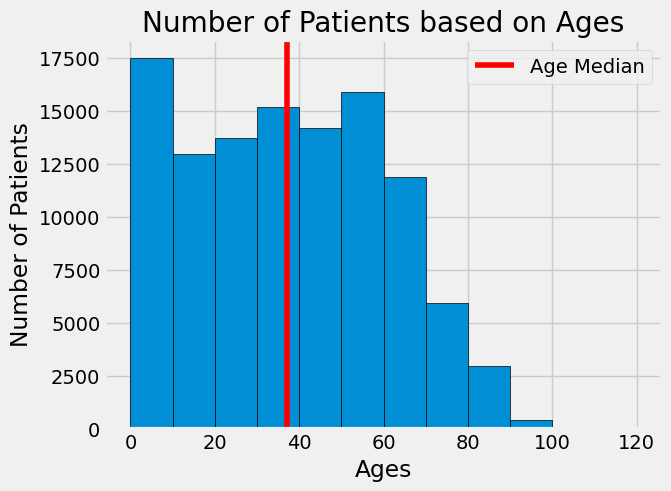

In [28]:
# Expolre the patients age
ages = df['age']
median_age = ages.median()
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
plt.style.use('fivethirtyeight')
plt.hist(ages, bins=bins, edgecolor='black')
plt.axvline(median_age, color='red', label='Age Median')
plt.legend()
plt.title("Number of Patients based on Ages")
plt.xlabel("Ages")
plt.ylabel("Number of Patients");

- The peak of the age graph lies to the left side of the center from __0 to 10__. 
- On the right side of the graph, the frequencies of observations are lower than to the left side.
***

#### Based on the main quetion why a proportion of patients miss their scheduled appointments?
- We will split the patients two parts: __Showed__ up AND __No Showed__ up for their appointments.

In [29]:
# Investigate for number of patients Show and No Show based on 'no_show' column
show = df['no_show'] == 'No'
noshow = df['no_show'] == 'Yes'
df[show].shape[0], df[noshow].shape[0]

(88208, 22319)

In [30]:
# check Show and No_Show results to the total patients
df[show].shape[0]+ df[noshow].shape[0] == df.shape[0]

True

In [31]:
# Percentage status for total percent attendence
show_percent = round(df[show].shape[0] / df.shape[0] *100)
noshow_percent = round(df[noshow].shape[0] / df.shape[0] *100)
print('There are {}% patients have been showed up and {}% miss their appointments.'.format(show_percent,noshow_percent))

There are 80% patients have been showed up and 20% miss their appointments.


In [32]:
df_show_mean = pd.DataFrame(df[show].mean(numeric_only=True))
df_show_mean

,0
age,37.790496
scholarship,0.093903
hypertension,0.204392
diabetes,0.073837
alcoholism,0.030417
handcap,0.022742
sms_received,0.291334


- The patient mean age is __37__ years for patients that showed for their appointments.
- Almost __30%__ of them only received SMS messages.

In [33]:
df_noshow_mean = pd.DataFrame(df[noshow].mean(numeric_only=True))
df_noshow_mean

,0
age,34.317667
scholarship,0.115507
hypertension,0.169004
diabetes,0.064071
alcoholism,0.030333
handcap,0.020297
sms_received,0.438371


- The patient mean age is __34__ years for patients that showed for their appointments.
- Almost __44%__ of them only received SMS messages.

### Q: Does patient attendance get affected by Age?

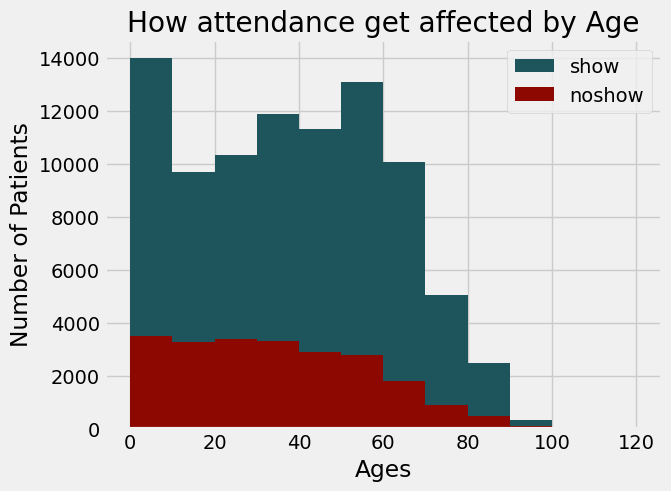

In [34]:
# How attendance get affected by Age
def factor_effect(df, feature, attend, miss):
    plt.style.use('fivethirtyeight')
    bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
    
    df[feature][show].hist(bins=bins, color='#1e555c', label='show')
    df[feature][noshow].hist(bins=bins, color='#8d0801', label='noshow')
    
    plt.legend();
    plt.title("How attendance get affected by Age")
    plt.xlabel("Ages")
    plt.ylabel("Number of Patients");
factor_effect(df, 'age', show, noshow)

- The patients group from 0 to 10 showed up properly because the have come with their parents.
- The second high attended group was from 50 to 60, then group from 30 to 40.
- The least groups attendance was from 80 and above.

### Q: Does patient attendance get affected by Gender?

C:\Users\Syalah\AppData\Local\Temp\ipykernel_2160\505902477.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')


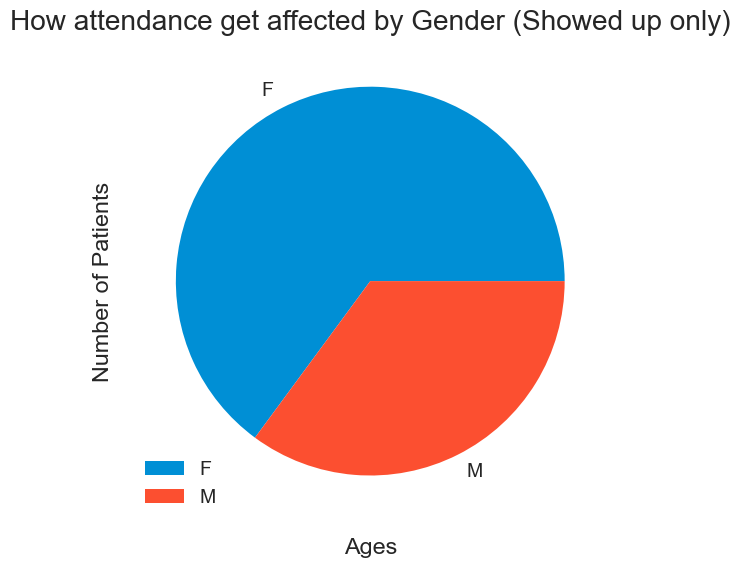

In [35]:
# How attendance get affected by Gender (Showed up only)
def factor_effect(df, feature, attend, miss):
    plt.style.use('seaborn-ticks')
    plt.figure(figsize=(12,6))
    
    df[feature][show].value_counts().plot(kind='pie', label='show')
    
    plt.legend();
    plt.title("How attendance get affected by Gender (Showed up only)")
    plt.xlabel("Ages")
    plt.ylabel("Number of Patients");
factor_effect(df, 'gender', show, noshow)

- Most of the patients __showed up__ on their appointments was __Female__.

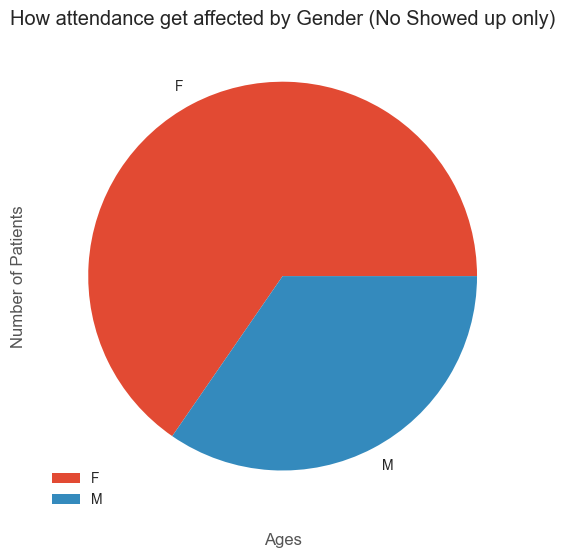

In [36]:
# How attendance get affected by Gender (No Showed up only)
def factor_effect(df, feature, attend, miss):
    plt.style.use('ggplot')
    plt.figure(figsize=(12,6))
    
    df[feature][noshow].value_counts().plot(kind='pie', label='noshow')
    
    plt.legend();
    plt.title("How attendance get affected by Gender (No Showed up only)")
    plt.xlabel("Ages")
    plt.ylabel("Number of Patients");
factor_effect(df, 'gender', show, noshow)

- Most of the patients __miss__ their appointments was __Female also__.
- We could deduce that patient gender has __no direct effect__ on the attendance of appointments.

### Q: Does patient attendance get affected by Receiving SMS Message?

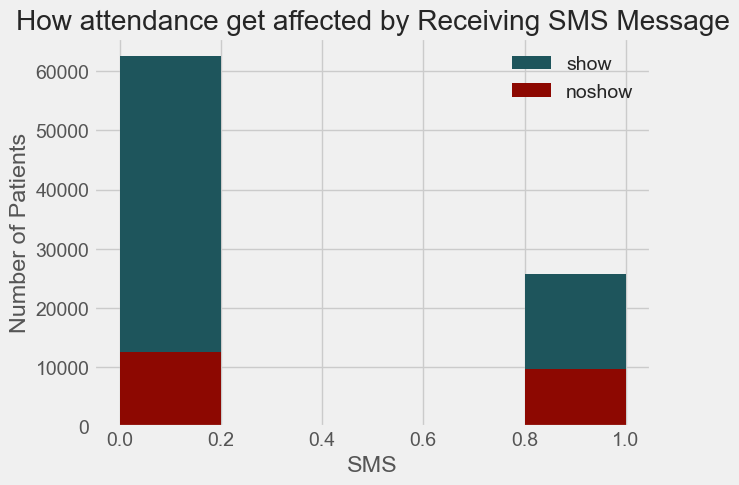

In [37]:
# How attendance get affected by Receiving SMS Message
def factor_effect(df, feature, attend, miss):
    plt.style.use('fivethirtyeight')
    
    df[feature][show].hist(alpha=1, bins=5, color='#1e555c', label='show')
    df[feature][noshow].hist(alpha=1, bins=5, color='#8d0801', label='noshow')
    
    plt.legend();
    plt.title("How attendance get affected by Receiving SMS Message")
    plt.xlabel("SMS")
    plt.ylabel("Number of Patients");
factor_effect(df, 'sms_received', show, noshow)

- Most of patients had showed up __without receiving SMS messages__.
- Which means that the procedures followed for sending messages needs to be reviewed.

### Q: Does patient attendance get affected by Neighbourhood? (location of appointment)

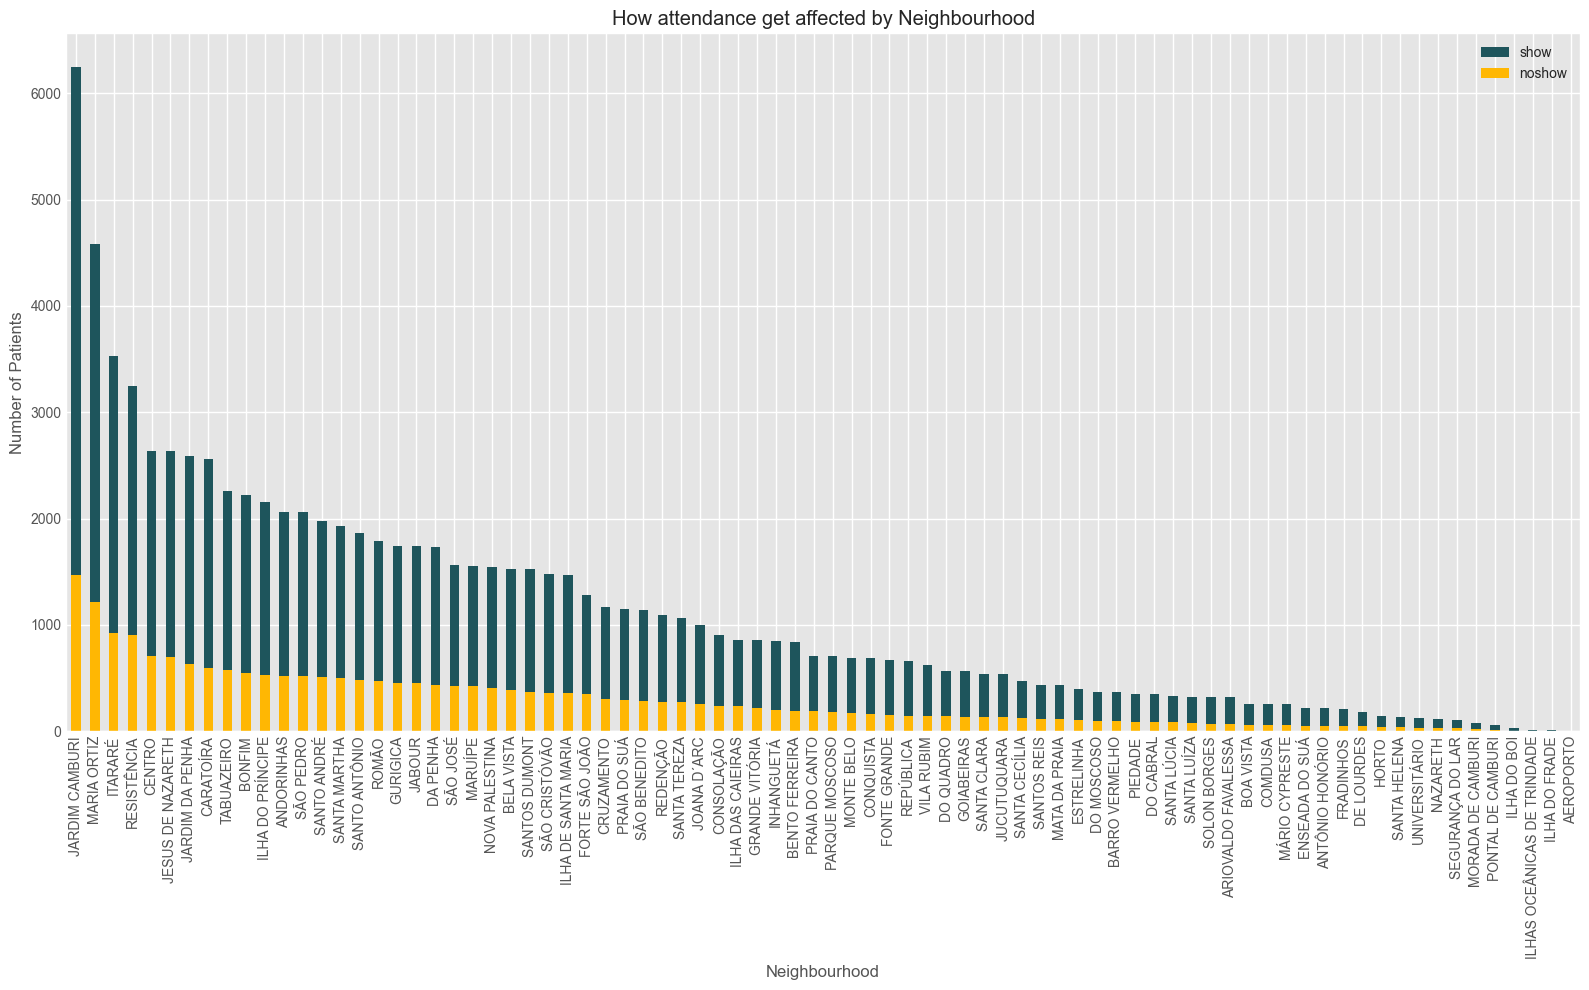

In [38]:
# How attendance get affected by Neighbourhood (location of appointment)
def factor_effect(df, feature, attend, miss):
    plt.style.use('ggplot')
    plt.figure(figsize=(16,10))
    
    df[feature][show].value_counts().plot(kind='bar', color='#1e555c', label='show')
    df[feature][noshow].value_counts().plot(kind='bar', color='#ffb703', label='noshow')
    
    plt.legend();
    plt.title("How attendance get affected by Neighbourhood")
    plt.xlabel("Neighbourhood")
    plt.ylabel("Number of Patients");
    plt.tight_layout()
factor_effect(df, 'neighbourhood', show, noshow)

- The attendance increased at some locations.
- Obviously the Neighbourhood factor has __direct effect__ on patients has attended.

In [39]:
# Most popular 10 locations (neigborhood) where patients showed up.
show_at_location = pd.DataFrame(df['neighbourhood'][show].value_counts().head(10))
print(show_at_location)

                 neighbourhood
JARDIM CAMBURI            6252
MARIA ORTIZ               4586
RESISTÊNCIA               3525
JARDIM DA PENHA           3246
SANTA MARTHA              2635
CENTRO                    2631
ITARARÉ                   2591
TABUAZEIRO                2559
SANTO ANTÔNIO             2262
BONFIM                    2223


### Q: Does patient attendance get affected by patient age for every neighbourhood?

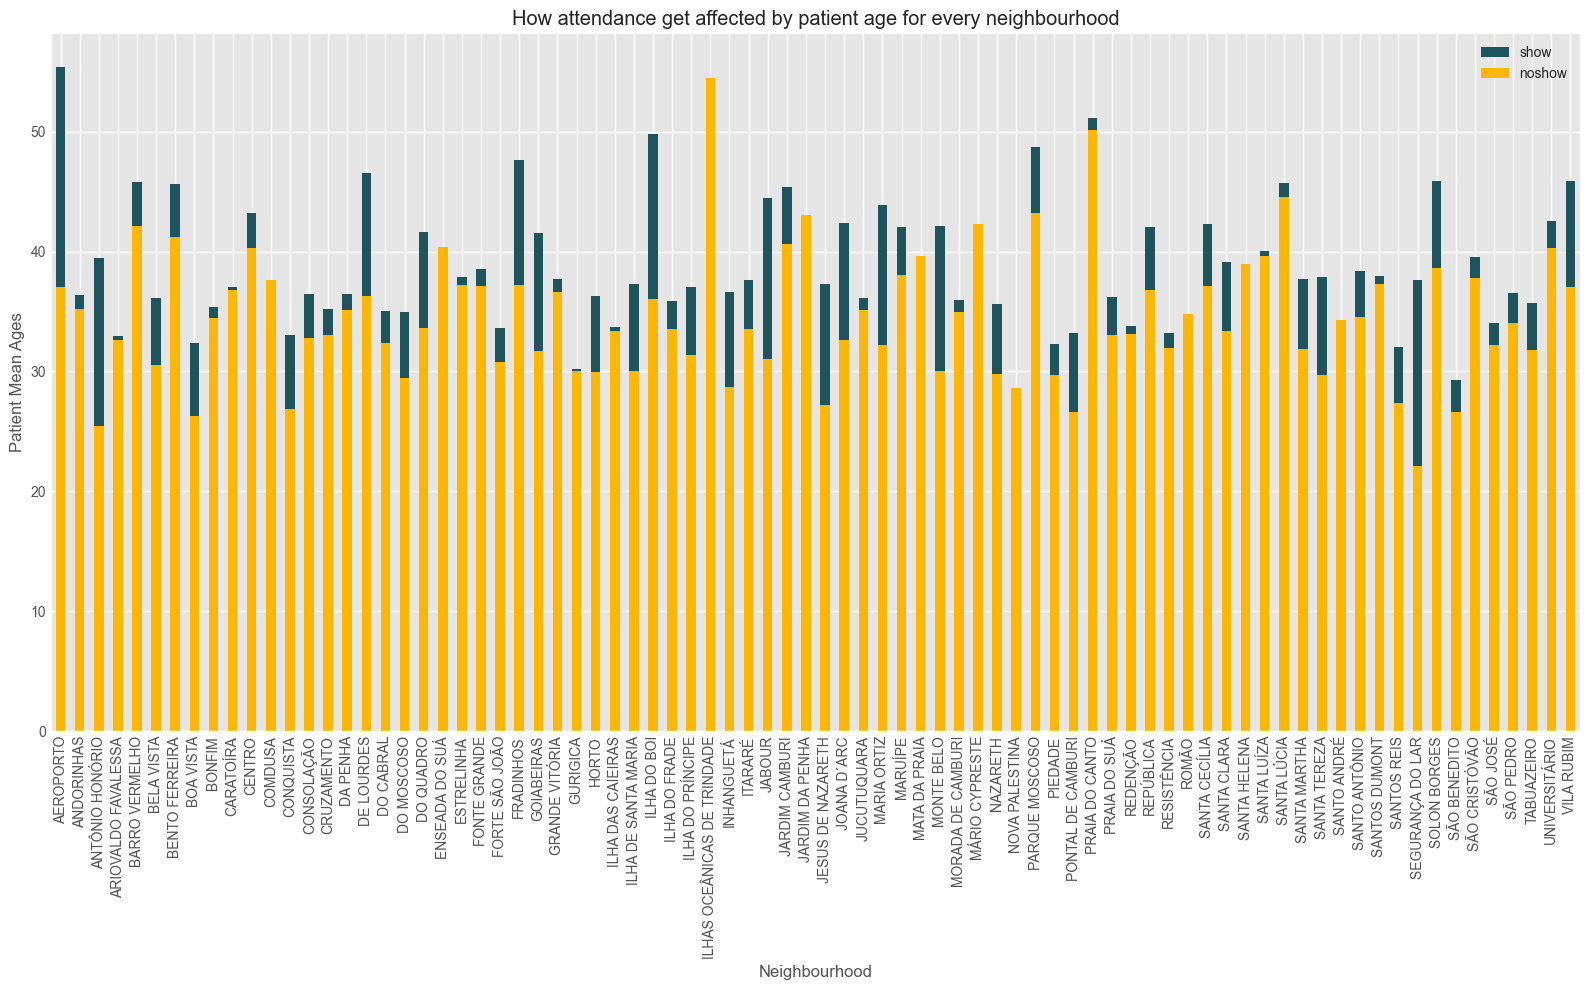

In [40]:
# How attendance get affected by patient age for every neighbourhood
plt.style.use('ggplot')
plt.figure(figsize=(16,10))

df[show].groupby('neighbourhood').age.mean().plot(kind='bar', color='#1e555c', label='show')
df[noshow].groupby('neighbourhood').age.mean().plot(kind='bar', color='#ffb703', label='noshow')

plt.legend();
plt.title("How attendance get affected by patient age for every neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Patient Mean Ages");
plt.tight_layout()

In [41]:
# Most popular 10 locations with mean patients age and where patient showed up.
df[show].groupby('neighbourhood').age.mean().head(10)

neighbourhood
AEROPORTO              55.428571
ANDORINHAS             36.375072
ANTÔNIO HONÓRIO        39.425339
ARIOVALDO FAVALESSA    32.918182
BARRO VERMELHO         45.828313
BELA VISTA             36.089954
BENTO FERREIRA         45.612030
BOA VISTA              32.377953
BONFIM                 35.350427
CARATOÍRA              37.082573
Name: age, dtype: float64

- Most of patients with avearge ages showed up in most of neighbourhood(locations).

### Q: Does patient attendance get affected by Scholarship (Walfare Program)?

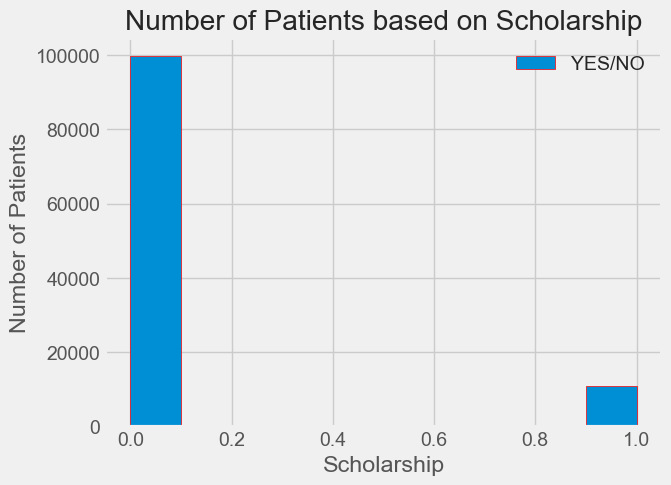

In [42]:
# Expolre the patients enrolling in Scholarship (yes=1, no=0)
plt.style.use('fivethirtyeight')
df.hist('scholarship', edgecolor='red', label='YES/NO');
plt.legend()
plt.title("Number of Patients based on Scholarship")
plt.xlabel("Scholarship")
plt.ylabel("Number of Patients");

- The __minority__ of patients wheather attend or miss their appointments are __NOT enrolled__ in the __Scholarship__ (Walfare Program).

In [43]:
# Check patients have showed up with Scholarship.
df['scholarship'][show].value_counts()

0    79925
1     8283
Name: scholarship, dtype: int64

- There are 8283 from 88208 (__9%__) total attended patients are enrolled in Scholarship (Walfare Program).

In [44]:
df['scholarship'][noshow].value_counts()

0    19741
1     2578
Name: scholarship, dtype: int64

- There are 2578 from 22319 (__11.5%__) total absent patients are enrolled in Scholarship (Walfare Program).

### Q: Does patient attendance get affected by hypertension or Diabetes based on their Ages?

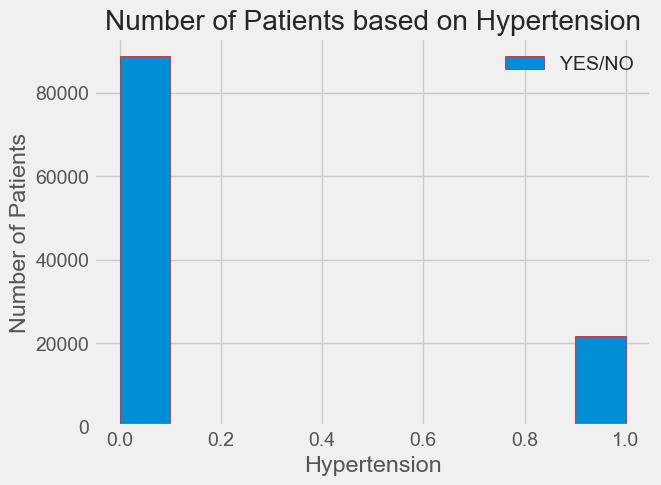

In [45]:
# Expolre the patients suffering from hypertension (yes=1, no=0)
plt.style.use('fivethirtyeight')
df.hist('hypertension', edgecolor='red', label='YES/NO');
plt.legend()
plt.title("Number of Patients based on Hypertension")
plt.xlabel("Hypertension")
plt.ylabel("Number of Patients");

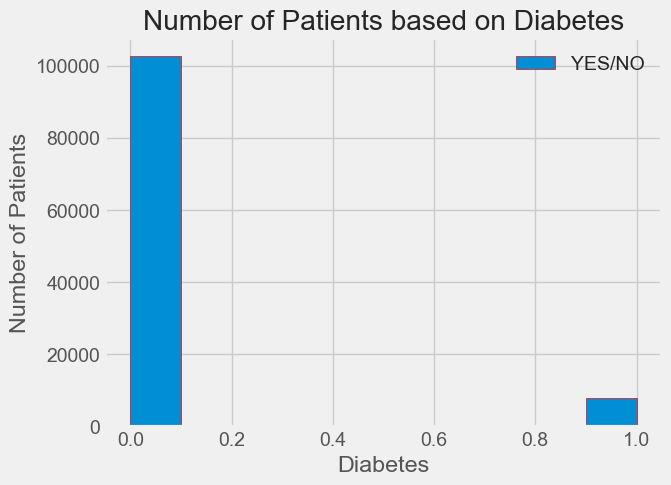

In [46]:
# Expolre the patients suffering from Diabetes (yes=1, no=0)
plt.style.use('fivethirtyeight')
df.hist('diabetes', edgecolor='red', label='YES/NO');
plt.legend()
plt.title("Number of Patients based on Diabetes")
plt.xlabel("Diabetes")
plt.ylabel("Number of Patients");

- The __majority__ of patients wheather attend or miss their appointments are __NOT suffering__ from __Hypertension__ or __Diabetes__.

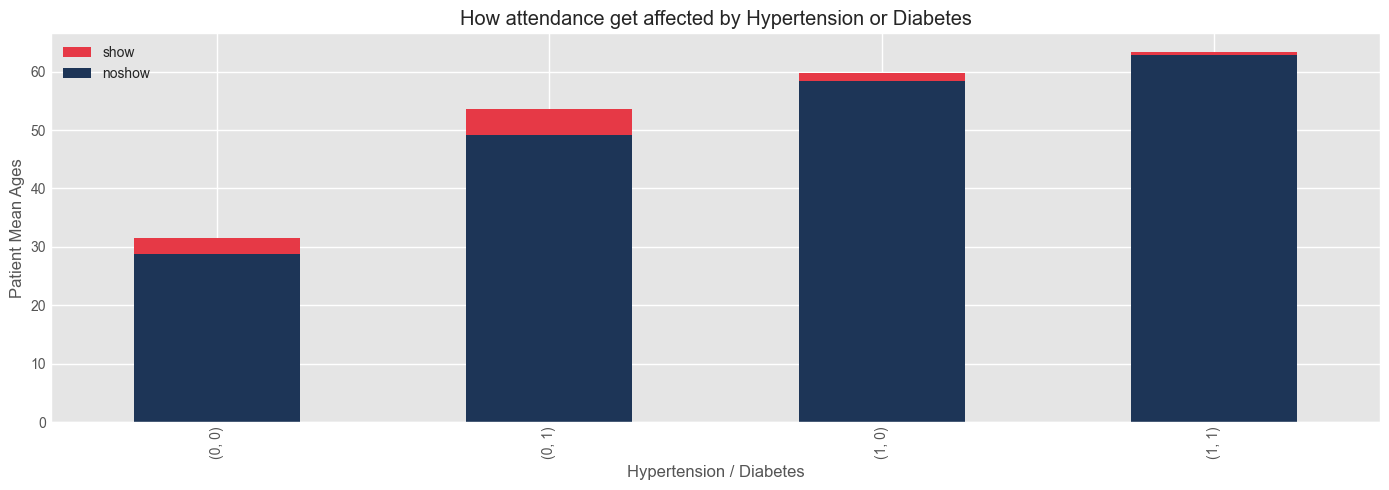

In [47]:
# How attendance get affected by Hypertension or Diabetes
plt.style.use('ggplot')
plt.figure(figsize=(14,5))

df[show].groupby(['hypertension', 'diabetes'])['age'].mean().plot(kind='bar', color='#e63946', label='show')
df[noshow].groupby(['hypertension', 'diabetes'])['age'].mean().plot(kind='bar', color='#1d3557', label='noshow')

plt.legend();
plt.title("How attendance get affected by Hypertension or Diabetes")
plt.xlabel("Hypertension / Diabetes")
plt.ylabel("Patient Mean Ages");
plt.tight_layout()

In [48]:
show_hy_di_mean_age = pd.DataFrame(df[show].groupby(['hypertension', 'diabetes'])['age'].mean())
show_hy_di_mean_age

age
hypertension diabetes           
0            0         31.510514
             1         53.666952
1            0         59.702144
             1         63.406361

- The patients had attend:<br> The average patient ages suffering from Hypertension or Diabetes.

In [49]:
noshow_hy_di_mean_age = pd.DataFrame(df[noshow].groupby(['hypertension', 'diabetes'])['age'].mean())
noshow_hy_di_mean_age

age
hypertension diabetes           
0            0         28.834155
             1         49.183391
1            0         58.377043
             1         62.820333

- The patients had missed:<br> The average patient ages suffering from Hypertension or Diabetes.

<a id='conclusions'></a>
## Conclusions

- The __peak__ of the age effect lies in group of __ages__ between __0 and 10__ properly because the have come with their parents. <br> The second high attended group was from 50 to 60, then group from 30 to 40. <br>The least groups attendance was from 80 and above.
- Almost __70%__ of the patients that have been showed up for their appointment didn't received SMS messages.<br> Which means that the procedures followed for sending messages needs to be reviewed.
- Obviously the Neighbourhood factor has __direct effect__ on patients has attended.
- Most of the patients __showed up__ on their appointments was __Female__.
- We could deduce that patient gender has __no direct effect__ on the attendance of appointments.


## Limitation

- There are no direct correlation between patient attendance and gender, scholarship, hypertension or diabetes has no effects.

In [50]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1